# **An analysis of Air quality index**


### 1.  Introduction and problem definition
Globally, many cities continuously assess the air quality using various monitoring techniques to record the concentrations of the pollutants in the air. Air quality can be defined as the measurement of the quality of air we breathe and the concentrations of the pollutants in the air that can cause various health issues (Gogineni, 2022). This can be measured with the aid of various machine learning algorithms and alot of countries use the Air Quality Index (AQI) for the real time spreading of the information on the quality of air. This analysis involves a modified air quality dataset sourced from GCU Learn (AirQuality.zip), comprising of 9358 hourly-averaged readings from 5 metal-oxide chemical sensors within a significantly polluted area in an Italian city. It was collected over a 1 year period from March 2004 to February 2005, the dataset encompasses raw sensor data represented as integer values, alongside ground-truth hourly-averaged concentrations for Carbon Monoxide (CO), Non-Methanic Hydrocarbons (NMHC), Benzene, Total Nitrogen Oxides (NOx), and Nitrogen Dioxide (NO2). (De Vito et al, 2009) posited that air quality also reflects cross-sensitivities, concept drifts, and sensor drifts as outlined by potentially impacting the sensors' accuracy in estimating concentrations.[Here](https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set/data) provides a brief description of the columns in the dataset.



### - A discussion on why the problems described in the tasks below are regression or classification ones
In distinguishing between regression and classification problems, the major difference lies within the nature of the target feature. In classification, we typically deal with a finite set of distinct categorical values that are easily countable. Conversely, regression is a supervised machine learning approach that is generally used to predict continuous values. In regression, our focus shifts to target features represented by continuous, real-number values. While classification aims to categorize data into discrete classes, regression is centered on analysing, estimating, and predicting numerical values. Due to our aim to predict numerical variables and our values are continious in nature, the problems in this notebook are regression based problem.

### - Objective.

Using linear regression how can we predict the values of our target variables CO(GT), and AIQ.

## Library Importation
To work with the data it is necessary to import all relevant Python modules. to avoid spreading it throughout the whole file.

In [ ]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
%matplotlib inline

## 2. Data ingeston
#### Loading the dataset into this notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airq_df = pd.read_csv("/content/drive/MyDrive/AirQuality.csv")

In [ ]:
airq_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


#### Description of Statistical data types of all fields above.
The code below shows the data types of each field in the dataset. The data types are a combination of integer, float and objects.


# Print out the top few lines of each dataframe to check that the split was correct
print(X.shape,"\n",y.shape)
print(X_train.shape,"\n",y_train.shape)
print(X_test.shape,"\n",y_test.shape)
print(X_train.head(3))
print(X_test.head(3))
print(y_train.head(3))
print(y_test.head(3))

In [ ]:
airq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T(C)           9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
# find out basic statistics on all features in the dataframe
airq_df.describe(include="all")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,21/09/2004,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-33.970097,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,NaN,NaN,77.458405,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,NaN,NaN,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,NaN,NaN,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,NaN,NaN,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200


|Field Name | Data type|
| --- | --- |
|Date       |       Ordinal|
|Time       |       Ordinal|
|CO(GT)     |       Numeric|
|PT08.S1(CO)      | Numeric|
|NMHC(GT)       |      Numeric|
|C6H6(GT)       |      Numeric|
|PT08.S2(NMHC)       |      Numeric|
|NOx(GT)       |      Numeric|
|NO2(GT)       |      Numeric|
|PT08.S4(NO2)       |      Numeric|
|PT08.S5(O3)       |      Numeric|
|T(C)       |      Numeric|
|RH       |      Numeric|
|AH       |      Numeric|

## 3. Data preparation (common to both tasks)
The following preparation steps are being undertaken as a result of the exploratory data analysis that has been carried out.

#### - Drop the empty columns, and any other column that you won’t need for your analysis (reasoning why)

In [ ]:
# for now just the empty columns will be dropped
# This dropping will include only the last two columns using .iloc
airq_df = airq_df.iloc[:, :-2]

In [ ]:
# check to see the columns have been dropped
airq_df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
dtype: int64

The last two has been dropped.

#### - Replace the “-200” values by np.nan for the correct operations of the usual functions

In [ ]:
airq_df.replace(-200, np.nan, inplace=True)

In [ ]:
# check to see new count of nan values
airq_df.isna().sum()

Date                0
Time                0
CO(GT)           1672
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T(C)              366
dtype: int64

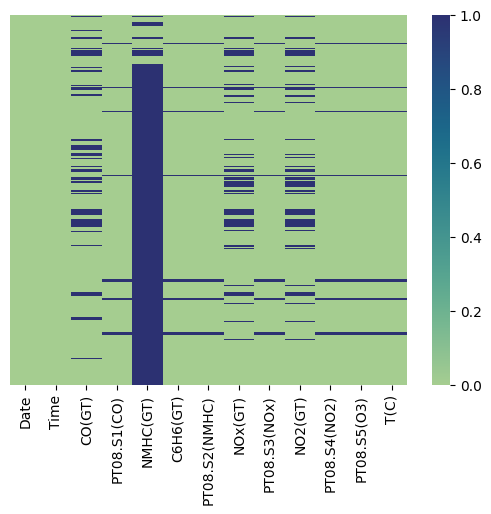

In [ ]:
# check to get a visual representation of nan_value rows for each column.
sb.heatmap(airq_df.isna(),yticklabels=False,cmap='crest')
plt.show()

In [ ]:
total_rows=len(airq_df)
missing_counts = airq_df.isnull().sum()
missing_percentage = (missing_counts / total_rows) * 100

#creare a DataFrame to display the results
missing_airq_df = pd.DataFrame ({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

#dispaly the the DataFrame
missing_airq_df

,Column,Missing Percentage
0,Date,0.000000
1,Time,0.000000
2,CO(GT),17.868975
3,PT08.S1(CO),3.911510
4,NMHC(GT),90.231912
5,C6H6(GT),3.911510
6,PT08.S2(NMHC),3.911510
7,NOx(GT),17.516298
8,PT08.S3(NOx),3.911510
9,NO2(GT),17.548360


"The columns with 3.9115% missing values show missing values in corresponding rows. As they have less than 5% of the dataset, they can be dropped later in the notebook."

#### - Create a new attribute (column) indicating the day of the week, for instance using: df["DayOfWeek"] = pd.to_datetime(df["Date"], dayfirst=True).dt.day_name()

In [ ]:
airq_df["DayOfWeek"] = pd.to_datetime(airq_df["Date"], dayfirst=True).dt.day_name()

In [ ]:
#check the new column
airq_df.sample(5, random_state=1234)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek
581,03/04/2004,23:00:00,NaN,1316.0,NaN,9.3,952.0,NaN,847.0,NaN,1644.0,1047.0,17.5,Saturday
4367,08/09/2004,17:00:00,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
1632,17/05/2004,18:00:00,3.1,1153.0,NaN,15.6,1168.0,163.0,842.0,121.0,1644.0,1021.0,24.3,Monday
850,15/04/2004,04:00:00,NaN,847.0,NaN,1.3,527.0,NaN,1416.0,NaN,1216.0,682.0,10.5,Thursday
9049,22/03/2005,19:00:00,4.5,1487.0,NaN,21.9,1350.0,605.0,418.0,198.0,1698.0,1692.0,20.1,Tuesday


#### - Create a new field that indicates whether it is a peak time or not

In [ ]:
# First convert the time column from str to datetime
airq_df['hour'] = pd.to_datetime(airq_df['Time']).dt.hour

In [ ]:
#check the new column
airq_df.sample(2, random_state=1234)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour
581,03/04/2004,23:00:00,NaN,1316.0,NaN,9.3,952.0,NaN,847.0,NaN,1644.0,1047.0,17.5,Saturday,23
4367,08/09/2004,17:00:00,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,17


In [ ]:
# Create a function to determine peak road usage
def is_peak(hour, day_of_week):
    working_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

    if day_of_week in working_days:
        if (8 <= hour <= 12) or (18 <= hour <= 22):
            return 1  # Peak road usage hours on working days
        else:
            return 0
    else:
        if 9 <= hour <= 12:
            return 1  # Peak road usage hours on weekends
        else:
            return 0

In [ ]:
# Applying the function to create 'peak_usage' column
airq_df['peak_usage'] = airq_df.apply(lambda row: is_peak(row['hour'], row['DayOfWeek']), axis=1)

In [ ]:
#check the new column
airq_df.sample(10, random_state=1234)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour,peak_usage
581,03/04/2004,23:00:00,NaN,1316.0,NaN,9.3,952.0,NaN,847.0,NaN,1644.0,1047.0,17.5,Saturday,23,0
4367,08/09/2004,17:00:00,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,17,0
1632,17/05/2004,18:00:00,3.1,1153.0,NaN,15.6,1168.0,163.0,842.0,121.0,1644.0,1021.0,24.3,Monday,18,1
850,15/04/2004,04:00:00,NaN,847.0,NaN,1.3,527.0,NaN,1416.0,NaN,1216.0,682.0,10.5,Thursday,4,0
9049,22/03/2005,19:00:00,4.5,1487.0,NaN,21.9,1350.0,605.0,418.0,198.0,1698.0,1692.0,20.1,Tuesday,19,1
4145,30/08/2004,11:00:00,NaN,1143.0,NaN,11.8,1043.0,NaN,643.0,NaN,1747.0,1079.0,29.9,Monday,11,1
3391,30/07/2004,01:00:00,NaN,1005.0,NaN,8.0,900.0,62.0,747.0,81.0,1620.0,1000.0,25.1,Friday,1,0
7357,11/01/2005,07:00:00,1.3,1126.0,NaN,5.2,775.0,236.0,760.0,101.0,1205.0,1019.0,11.7,Tuesday,7,0
5920,12/11/2004,10:00:00,1.6,978.0,NaN,6.4,831.0,257.0,807.0,116.0,1257.0,838.0,14.9,Friday,10,1
6546,08/12/2004,12:00:00,2.1,1202.0,NaN,9.5,958.0,302.0,732.0,92.0,1330.0,1181.0,16.0,Wednesday,12,1


#### - Create a new field that indicates whether it is valley time or not

In [ ]:
# Applying the function to create 'valley_usage' column
airq_df['valley_usage'] =  [1 if x in list(range(2,6))  else 0 for x in airq_df['hour']]

In [ ]:
#check the new column
airq_df.sample(10, random_state=1234)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour,peak_usage,valley_usage
581,03/04/2004,23:00:00,NaN,1316.0,NaN,9.3,952.0,NaN,847.0,NaN,1644.0,1047.0,17.5,Saturday,23,0,0
4367,08/09/2004,17:00:00,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,17,0,0
1632,17/05/2004,18:00:00,3.1,1153.0,NaN,15.6,1168.0,163.0,842.0,121.0,1644.0,1021.0,24.3,Monday,18,1,0
850,15/04/2004,04:00:00,NaN,847.0,NaN,1.3,527.0,NaN,1416.0,NaN,1216.0,682.0,10.5,Thursday,4,0,1
9049,22/03/2005,19:00:00,4.5,1487.0,NaN,21.9,1350.0,605.0,418.0,198.0,1698.0,1692.0,20.1,Tuesday,19,1,0
4145,30/08/2004,11:00:00,NaN,1143.0,NaN,11.8,1043.0,NaN,643.0,NaN,1747.0,1079.0,29.9,Monday,11,1,0
3391,30/07/2004,01:00:00,NaN,1005.0,NaN,8.0,900.0,62.0,747.0,81.0,1620.0,1000.0,25.1,Friday,1,0,0
7357,11/01/2005,07:00:00,1.3,1126.0,NaN,5.2,775.0,236.0,760.0,101.0,1205.0,1019.0,11.7,Tuesday,7,0,0
5920,12/11/2004,10:00:00,1.6,978.0,NaN,6.4,831.0,257.0,807.0,116.0,1257.0,838.0,14.9,Friday,10,1,0
6546,08/12/2004,12:00:00,2.1,1202.0,NaN,9.5,958.0,302.0,732.0,92.0,1330.0,1181.0,16.0,Wednesday,12,1,0


# TASK 1: CO concentration prediction
Predict the CO concentration (in mg/m3) based on, at least, the PT08.S1(CO) raw sensor readings, day of the week and time.

Maybe temperature and humidity can play a role as well?

Use CO(GT) as the ground truth.

## 4. Further Data preparation (specific for this task)

##### A quick assessment of the dataset so far will be beneficial.

In [ ]:
airq_df.describe(include="all")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour,peak_usage,valley_usage
count,9357,9357,7685.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,9357,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN
top,21/09/2004,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1344,NaN,NaN,NaN
mean,NaN,NaN,2.152479,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,NaN,11.498557,0.344982,0.166720
std,NaN,NaN,1.453714,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,NaN,6.923182,0.475388,0.372746
min,NaN,NaN,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,NaN,5.000000,0.000000,0.000000
50%,NaN,NaN,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,NaN,11.000000,0.000000,0.000000
75%,NaN,NaN,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,NaN,18.000000,1.000000,0.000000


In [ ]:
# Creating a dictionary mapping days of the week to numeric values
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Mapping day names to numeric values
airq_df['numDayOfWeek'] = airq_df['DayOfWeek'].map(day_mapping)

In [ ]:
# get the percentage of nan values
total_rows=len(airq_df)
missing_counts = airq_df.isnull().sum()
missing_percentage = (missing_counts / total_rows) * 100

#creare a DataFrame to display the results
missing_airq_df = pd.DataFrame ({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

#dispaly the the DataFrame
missing_airq_df

,Column,Missing Percentage
0,Date,0.000000
1,Time,0.000000
2,CO(GT),17.868975
3,PT08.S1(CO),3.911510
4,NMHC(GT),90.231912
5,C6H6(GT),3.911510
6,PT08.S2(NMHC),3.911510
7,NOx(GT),17.516298
8,PT08.S3(NOx),3.911510
9,NO2(GT),17.548360


In [ ]:
# Create a copy of the df for task 4
task4_airq_df = airq_df.copy()

Copying helps to retain the original dataset's while carrying out data manipulation and transformation.

#### Further dropping of the columns that won’t be used for this task 1
1. The NMHC(GT) column will be dropped because it has too many missing values.  
2. The Date and Time columns will be dropped in order to avoid multicollinearity with the newly created columns.

In [ ]:
task4_airq_df.drop(columns=["NMHC(GT)", "Date", "Time"], inplace=True)

#### - Automatically fill in the missing values in the columns that you are going to use, with values that would most closely mirror the actual missing values (explain why)

To prepare for the task, we'll first explore correlations between variables by initially using the 'airq_df' DataFrame. Converting the 'DayOfWeek' column into a numeric format will facilitate computing correlations among different fields, aiding in identifying linear relationships. Following this, missing values, which constitute approximately 3.91% of the dataset, will be dropped. For columns with around 17% missing values, we'll utilize the aforementioned approach to impute missing values.

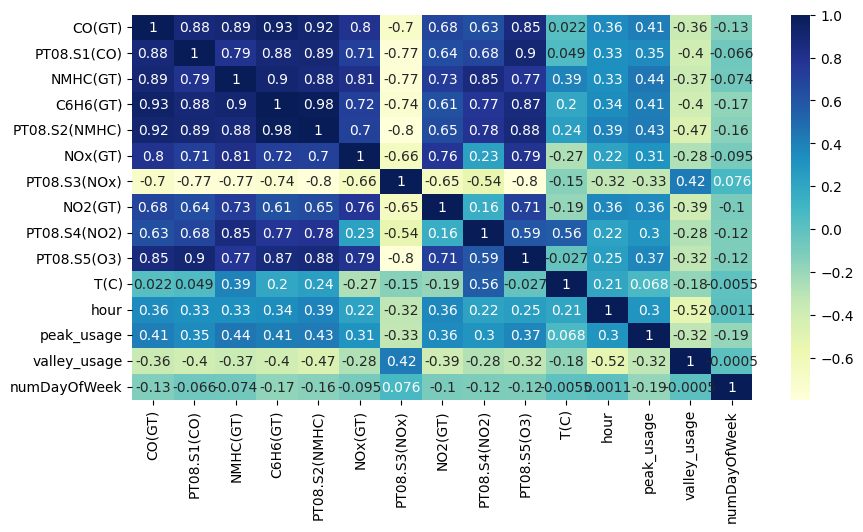

In [ ]:
plt.figure(figsize=(10,5))
sb.heatmap(airq_df.select_dtypes(include='number').corr(),cmap='YlGnBu',annot=True)
plt.show()

To address missing values in CO(GT), NOx(GT), and NO2(GT) columns, it require a need to identify highly correlated categorical columns. Averaging the classes within these categories, combined with the hour column, will provide details on how to go about filling the missing data within our numerical columns. This strategy leverages correlated categorical data to accurately impute missing values in our target numerical columns.


|NA Column| Most Correlated Categorical Column|Correlation Coeficient|
|--|--|--|
|CO(GT)|peak_usage|0.41|
|NOx(GT)|peak_usage|0.31|
|NO2(GT)|valley_usage|-0.39|

In [ ]:
airq_peak_usage = task4_airq_df.groupby(by=['peak_usage','hour']).median(numeric_only=True)
airq_peak_usage.sample(5, random_state=1234)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
peak_usage hour                                                          
0          7        1.5       1089.0      7.70          886.0    188.0   
           14       2.0       1072.0      9.85          973.5    173.0   
           4        0.6        868.0      2.60          624.0     55.5   
           1        1.3        986.0      5.50          790.0    110.5   
1          21       2.5       1123.0     11.40         1028.5    226.5   

                 PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T(C)  \
peak_usage hour                                                            
0          7            762.0     95.0        1468.0       1052.0  14.55   
           14           800.5    117.0        1473.0        872.0  22.15   
           4           1089.0     55.0        1275.0        697.0  14.60   
           1            879.0     83.0        1382.0        881.5  15.55   
1          21           735.5    124.5        1571.0       1181.0  17.95   

                 valley_usage  numDayOfWeek  
peak_usage hour                              
0          7              0.0           4.0  
           14             0.0           4.0  
           4              1.0           4.0  
           1              0.0           4.0  
1          21             0.0           3.0

In [ ]:
airq_valley_usage = task4_airq_df.groupby(by=['valley_usage','hour']).median(numeric_only=True)
airq_valley_usage.sample(5, random_state=1234)

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
valley_usage hour                                                          
0            11       2.1       1130.5     10.25          987.0    219.0   
             20       3.3       1206.0     14.50         1133.0    277.0   
             6        0.9        948.0      4.30          727.0    103.0   
             7        1.5       1089.0      7.70          886.0    188.0   
             1        1.3        986.0      5.50          790.0    110.5   

                   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)   T(C)  \
valley_usage hour                                                            
0            11           770.5    122.0        1511.5       1073.5  20.55   
             20           681.0    140.0        1653.0       1244.0  18.60   
             6            936.5     68.0        1342.0        832.0  14.20   
             7            762.0     95.0        1468.0       1052.0  14.55   
             1            879.0     83.0        1382.0        881.5  15.55   

                   peak_usage  numDayOfWeek  
valley_usage hour                            
0            11           1.0           4.0  
             20           1.0           4.0  
             6            0.0           4.0  
             7            0.0           4.0  
             1            0.0           4.0

In [ ]:
# applied the median to the missing values
task4_airq_df['CO(GT)'] = task4_airq_df['CO(GT)'].fillna(task4_airq_df.groupby(by=['peak_usage','hour'])["CO(GT)"].transform('median'))


task4_airq_df['NOx(GT)'] = task4_airq_df['NOx(GT)'].fillna(task4_airq_df.groupby(by=['peak_usage','hour'])["NOx(GT)"].transform('median'))


task4_airq_df['NO2(GT)'] = task4_airq_df['NO2(GT)'].fillna(task4_airq_df.groupby(by=['valley_usage','hour'])["NO2(GT)"].transform('median'))

In [ ]:
# dropping NaN values in the df based on the 3.91% columns
task4_airq_df.dropna(axis=0,inplace=True)


In [ ]:
# check the new percentage of nan values
total_rows=len(task4_airq_df)
missing_counts = task4_airq_df.isnull().sum()
missing_percentage = (missing_counts / total_rows) * 100

#creare a DataFrame to display the results
missing_task4_airq_df = pd.DataFrame ({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

#dispaly the the DataFrame
missing_task4_airq_df

,Column,Missing Percentage
0,CO(GT),0.0
1,PT08.S1(CO),0.0
2,C6H6(GT),0.0
3,PT08.S2(NMHC),0.0
4,NOx(GT),0.0
5,PT08.S3(NOx),0.0
6,NO2(GT),0.0
7,PT08.S4(NO2),0.0
8,PT08.S5(O3),0.0
9,T(C),0.0


In [ ]:
airq_df.shape

(9357, 18)

In [ ]:
task4_airq_df.shape

(8991, 15)

#### A justification (and potential application) of whether you should use data binning or not
To assess the potential need for data binning, plotting histograms for all our numeric features would be beneficial.

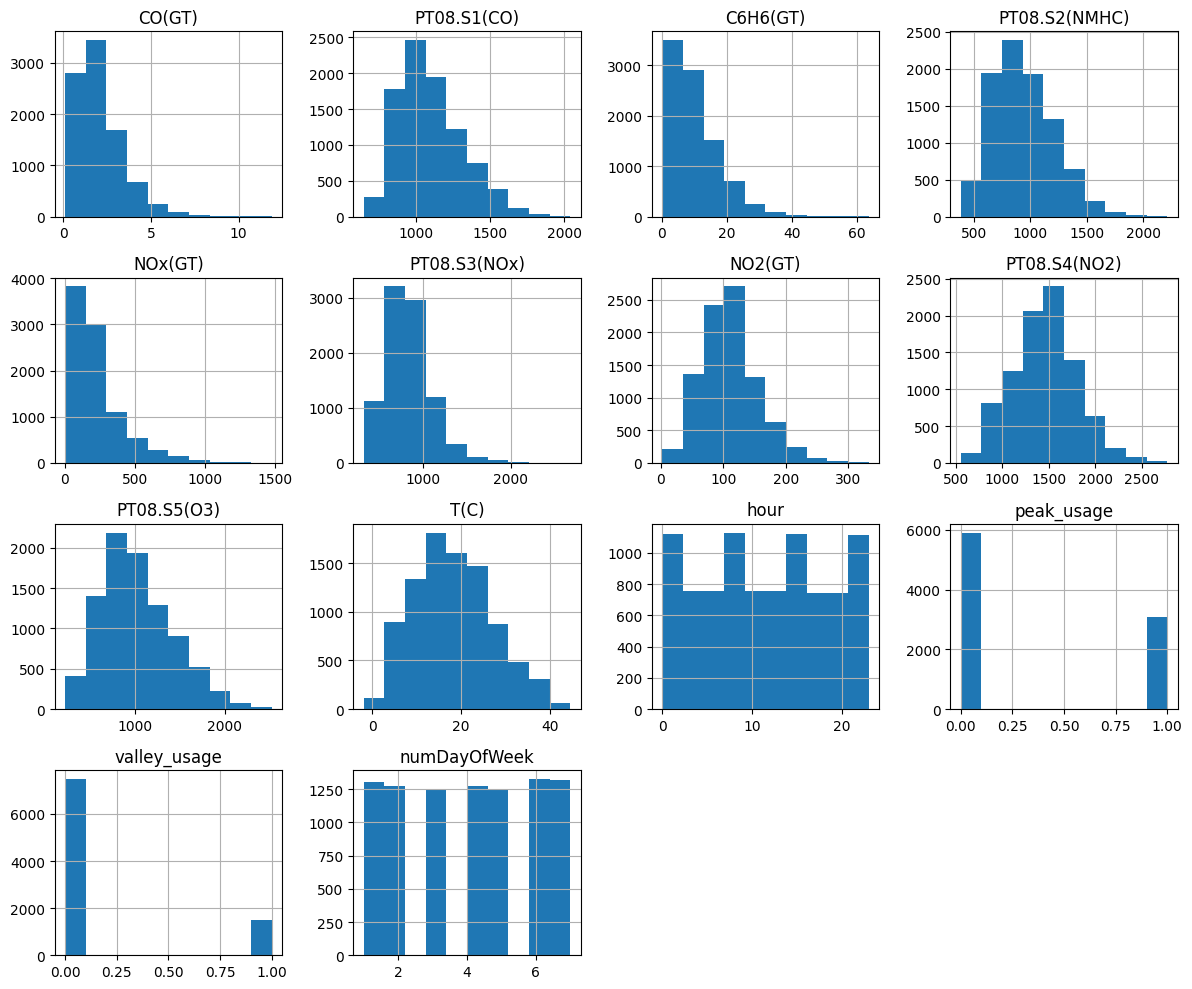

In [ ]:
# Assuming 'df' is your DataFrame containing numerical features
numerical_features = task4_airq_df.select_dtypes(include='number')

# Plotting histograms for all numeric features
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Data binning will mean loosing some information. It could mainly be applied if our data is noisy. Or if there is a fear of extreme outliers causing a bias in our models predictions. However, the histograms for the continuous features above do not provide enough evidence to implore data binning. Data binning here might have a more negative effect in training our model.

#### Suitable encoding of the data
For our dataset, encoding was only necessary for the *day of the week* and *hour of the day* columns. Other fields in the dataset are continuous, removing the need for encoding as they already contain continuous values.

Prior to splitting the data for model training, we'll specify the columns to be utilized for this task. Specifically, we'll focus on the PT08.S1(CO) feature from the various provided ground truth and sensor recording fields. This singular selection is due to strong correlations among these fields, and employing multiple ones could potentially introduce multicollinearity issues.

In [ ]:
task4_lr_cols = ["CO(GT)","PT08.S1(CO)","T(C)","hour", "numDayOfWeek"]
task4_lr_df = task4_airq_df[task4_lr_cols].copy()

## Data segregation
A proper data split is crucial to ensure that the test dataset accurately represents the variance present in the entire dataset. Employing a shuffled 80/20 split can effectively achieve this goal. This split randomly partitions the data into 80% for training the model and 20% for testing, allowing the test set to have a diverse range of patterns and variations present in the entire dataset.



In [ ]:
# extract the features and labels as above and same them  in variables X and y
X = task4_lr_df.drop(columns=['CO(GT)'])
y = task4_lr_df['CO(GT)']
# shuffle and extract an 80/20 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)

# Print out the top few lines of each dataframe to check that the split was correct
print(X.shape,"\n",y.shape)
print(X_train.shape,"\n",y_train.shape)
print(X_test.shape,"\n",y_test.shape)
print(X_train.head(3))
print(X_test.head(3))
print(y_train.head(3))
print(y_test.head(3))

(8991, 4) 
 (8991,)
(7192, 4) 
 (7192,)
(1799, 4) 
 (1799,)
      PT08.S1(CO)  T(C)  hour  numDayOfWeek
5801        805.0  18.0    11             7
2799       1226.0  26.0     9             1
3544       1135.0  31.7    10             4
      PT08.S1(CO)  T(C)  hour  numDayOfWeek
3337        933.0  28.4    19             2
6207       1423.0  10.3     9             3
5025        889.0  19.8     3             3
5801    0.7
2799    3.6
3544    2.4
Name: CO(GT), dtype: float64
3337    3.9
6207    4.2
5025    0.7
Name: CO(GT), dtype: float64


## 5. Model definition and training
Decision tree regression can be effective for predicting a variable in this dataset due to its ability to handle both linear and nonlinear relationships between features and the target variable. In datasets where there are complex interactions and non-linearities, decision trees can capture these patterns effectively. They're robust against outliers and can handle numerical and categorical data without requiring extensive pre-processing. Additionally, decision trees can handle interactions between features, making them suitable for datasets where such interactions are influential in predicting the target variable.

In [ ]:
# Create DTR object
DTR= DecisionTreeRegressor()

# Fit the model
DTR.fit(X_train,y_train)

# Make Predictions on X_test
yhat_dtr = DTR.predict(X_test)

In [ ]:
# Using the get_params() method
DTR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Hyperparameter tuning

 Hyperparameter tuning helps to identify the optimal set of hyperparameters for a machine learning algorithm.

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
    "max_features":["log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30]
}
DTR = DecisionTreeRegressor()
DTRgrid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)  # Adjust cv for cross-validation folds


In [ ]:
DTRgrid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4]})

In [ ]:
# Retrieve the best parameters and the best estimator
DTRbest_params = DTRgrid_search.best_params_
DTRbest_estimator = DTRgrid_search.best_estimator_

In [ ]:
print(DTRbest_params)
print(DTRbest_estimator)

{'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.1}
DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.1)


In [ ]:
# Making Predictions with tuned DTR
best_dtr = DTRbest_estimator
yhat_tunedDTR = best_dtr.predict(X_test)

## 6. Model evaluation
When evaluating the models, these three key metrics: R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE), will be used.

1. R-squared (R2): This metric measures how much of the variance in the dependent feature (in our case, 'CO(GT)') is explained by the independent features included in our model. It indicates the proportion of variability in the target variable that can be predicted from the input variables. The higher the better.

2. Mean Absolute Error (MAE): A fundamental metric, MAE calculates the average absolute difference between each predicted target value and its corresponding actual value. By summing the absolute differences and dividing by the total number of observations, it provides an average measure of the model's prediction error. The lower the better.

3. Mean Squared Error (MSE): Similar to MAE, MSE also assesses the average discrepancy between predicted and actual values. However, MSE squares the individual differences before calculating the mean, giving higher weight to larger errors. This metric aids in penalizing larger errors more significantly. The lower the better.

In [ ]:
import sklearn.metrics as sm
# Create a function to print metrics for different models
def eval_model(modelname, ytest, ypred):
    """modelname is a string
    ytest is the actual target
    ypred is the predicted target by the model"""

    print(f"{modelname} R2 score =", round(sm.r2_score(ytest, ypred), 2))
    print(f"{modelname} Mean absolute error =", round(sm.mean_absolute_error(ytest, ypred), 2))
    print(f"{modelname} Mean squared error =", round(sm.mean_squared_error(ytest, ypred), 2))
    print("\n\n\n")


eval_model("Decision Tree Regressor Base Model",y_test,yhat_dtr)
eval_model("Decision Tree Regressor Grid Searched Model",y_test,yhat_tunedDTR)


Decision Tree Regressor Base Model R2 score = 0.6
Decision Tree Regressor Base Model Mean absolute error = 0.56
Decision Tree Regressor Base Model Mean squared error = 0.7




Decision Tree Regressor Grid Searched Model R2 score = 0.65
Decision Tree Regressor Grid Searched Model Mean absolute error = 0.54
Decision Tree Regressor Grid Searched Model Mean squared error = 0.61






Metrics                |DTR Base Model|DTR Grid Searched Model|
-----------------------|----------------------|-----------------------|
R2 score               |0.62   | 0.65   | 0.6112  |
Mean Absolute Error    | 0.54   | 0.54  | 77.4675  |
Mean Squared Error     | 0.66  | 0.61   | 12446.0895  |


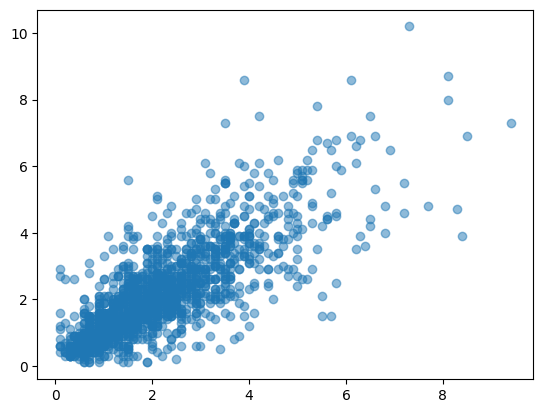

In [ ]:
plt.scatter(y_test, yhat_dtr,alpha=.5);

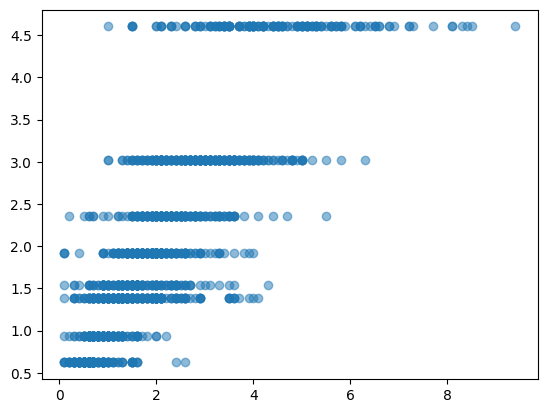

In [ ]:
plt.scatter(y_test, yhat_tunedDTR,alpha=.5);

# TASK 2: Air Quality Index creation and prediction
Define an Air Quality Index (based on adequate literature) by combining the ground-truth readings of several gases.

Then, use ML to predict your Air Quality Index from several raw sensor readings and other columns of interest (obviously without using the ground truth column).

## 4. Further Data preparation (specific for this task)


##### A quick assessment of the dataset so far will be beneficial.

In [ ]:
airq_df.describe(include="all")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour,peak_usage,valley_usage,numDayOfWeek
count,9357,9357,7685.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,9357,9357.000000,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN
top,21/09/2004,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday,NaN,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1344,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.152479,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,NaN,11.498557,0.344982,0.166720,4.009939
std,NaN,NaN,1.453714,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,NaN,6.923182,0.475388,0.372746,2.000323
min,NaN,NaN,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,NaN,5.000000,0.000000,0.000000,2.000000
50%,NaN,NaN,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,NaN,11.000000,0.000000,0.000000,4.000000
75%,NaN,NaN,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,NaN,18.000000,1.000000,0.000000,6.000000


In [ ]:
# To get the values of nan
airq_df.isna().sum()

Date                0
Time                0
CO(GT)           1672
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T(C)              366
DayOfWeek           0
hour                0
peak_usage          0
valley_usage        0
numDayOfWeek        0
dtype: int64

In [ ]:
# Create a copy of the df for task 5
task5_airq_df = airq_df.copy()

To ensure minimal impact on the model due to replaced values, The focus will be on creating an Air Quality Index (AQI) column from specific Ground Truth (GT) columns. To begin, I'll drop missing observations specifically in CO(GT), NOx(GT), and NO2(GT) fields, pivotal for calculating the AQI. Each of these columns will be categorized into sub-index columns for AQI calculation. Subsequently, for each observation, the worst value among these sub-indices will represent the AQI, enabling a comprehensive assessment of air quality in the dataset.

In [ ]:
# drop the nan rows for CO(GT), NOx(GT) and NO2(GT)
# Assuming 'df' is your DataFrame and you want to drop rows with missing values in columns 'Column1', 'Column2', and 'Column3'
columns_to_drop = ["CO(GT)", "NOx(GT)", "NO2(GT)"]  # Replace with your column names
task5_airq_df.dropna(subset=columns_to_drop, inplace=True)

In [ ]:
# check
task5_airq_df.isna().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       317
NMHC(GT)         6405
C6H6(GT)          317
PT08.S2(NMHC)     317
NOx(GT)             0
PT08.S3(NOx)      317
NO2(GT)             0
PT08.S4(NO2)      317
PT08.S5(O3)       317
T(C)              317
DayOfWeek           0
hour                0
peak_usage          0
valley_usage        0
numDayOfWeek        0
dtype: int64

In [ ]:
# drop same columns as in task 4
task5_airq_df.drop(columns=["NMHC(GT)", "Date", "Time"], inplace=True)

We'll handle missing values in the remaining columns using the method used in task4 earlier.

In [ ]:
airq_peak_usage5 = task5_airq_df.groupby(by=['peak_usage','hour']).median(numeric_only=True)
airq_valley_usage5 = task5_airq_df.groupby(by=['valley_usage','hour']).median(numeric_only=True)

In [ ]:
# apply the median to the missing values
task5_airq_df['PT08.S1(CO)'] = task5_airq_df['PT08.S1(CO)'].fillna(task5_airq_df.groupby(by=['peak_usage','hour'])["PT08.S1(CO)"].transform('median'))


task5_airq_df['C6H6(GT)'] = task5_airq_df['C6H6(GT)'].fillna(task5_airq_df.groupby(by=['peak_usage','hour'])["C6H6(GT)"].transform('median'))


task5_airq_df['PT08.S2(NMHC)'] = task5_airq_df['PT08.S2(NMHC)'].fillna(task5_airq_df.groupby(by=['valley_usage','hour'])["PT08.S2(NMHC)"].transform('median'))


task5_airq_df['PT08.S3(NOx)'] = task5_airq_df['PT08.S3(NOx)'].fillna(task5_airq_df.groupby(by=['peak_usage','hour'])["PT08.S3(NOx)"].transform('median'))


task5_airq_df['PT08.S4(NO2)'] = task5_airq_df['PT08.S4(NO2)'].fillna(task5_airq_df.groupby(by=['peak_usage','hour'])["PT08.S4(NO2)"].transform('median'))


task5_airq_df['PT08.S5(O3)'] = task5_airq_df['PT08.S5(O3)'].fillna(task5_airq_df.groupby(by=['valley_usage','hour'])["PT08.S5(O3)"].transform('median'))


task5_airq_df['T(C)'] = task5_airq_df['T(C)'].fillna(task5_airq_df.groupby(by=['peak_usage','hour'])["T(C)"].transform('median'))





In [ ]:
# check
task5_airq_df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T(C)             0
DayOfWeek        0
hour             0
peak_usage       0
valley_usage     0
numDayOfWeek     0
dtype: int64

To categorize the  CO(GT), NOx(GT), and NO2(GT) into sub-index columns we'll use data binning.

In [ ]:
## CO2 Sub-Index calculation
def get_CO_subindex(x):
    if x < 2:
        return "Excellent"
    elif x < 4:
        return "Fine"
    elif x < 8:
        return "Moderate"
    elif x < 30:
        return "Poor"
    elif x < 100:
        return "Very Poor"
    elif x >= 100:
        return "Severe"
    else:
        return "No range defined"

## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x < 25:
        return "Excellent"
    elif x < 50:
        return "Fine"
    elif x < 100:
        return "Moderate"
    elif x < 200:
        return "Poor"
    elif x < 400:
        return "Very Poor"
    elif x >= 400:
        return "Severe"
    else:
        return "No range defined"

## NOx Sub-Index calculation
## convert from ppb to u/mg^3 = x * 1.9125
def get_NOx_subindex(x):
    y = x * 1.9125
    if y < 25:
        return "Excellent"
    elif y < 50:
        return "Fine"
    elif y < 100:
        return "Moderate"
    elif y < 200:
        return "Poor"
    elif y < 400:
        return "Very Poor"
    elif y >= 400:
        return "Severe"
    else:
        return "No range defined"

# creating sub_index columns
task5_airq_df["co_subindex"] = task5_airq_df["CO(GT)"].apply(lambda x: get_CO_subindex(x))
task5_airq_df["nox_subindex"] = task5_airq_df["NOx(GT)"].apply(lambda x: get_CO_subindex(x))
task5_airq_df["no2_subindex"] = task5_airq_df["NO2(GT)"].apply(lambda x: get_CO_subindex(x))

In [ ]:
task5_airq_df.sample(10,random_state=1234)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),DayOfWeek,hour,peak_usage,valley_usage,numDayOfWeek,co_subindex,nox_subindex,no2_subindex
5756,4.4,1460.0,25.0,1430.0,524.0,466.0,125.0,1932.0,1604.0,23.0,Friday,14,0,0,5,Moderate,Severe,Severe
8546,2.8,1009.0,9.5,958.0,342.0,751.0,156.0,935.0,1006.0,1.4,Tuesday,20,1,0,2,Fine,Severe,Severe
2828,1.8,1058.0,11.3,1026.0,165.0,794.0,132.0,1622.0,931.0,39.9,Tuesday,14,0,0,2,Excellent,Severe,Severe
1360,2.5,1043.0,12.5,1066.0,161.0,789.0,114.0,1692.0,1014.0,20.2,Thursday,10,1,0,4,Fine,Severe,Severe
5503,1.6,989.0,8.0,900.0,231.0,737.0,60.0,1401.0,968.0,16.8,Tuesday,1,0,0,2,Excellent,Severe,Very Poor
1298,3.2,1324.0,13.1,1086.0,149.0,692.0,113.0,1903.0,1189.0,19.3,Monday,20,1,0,1,Fine,Severe,Severe
8336,0.8,910.0,1.2,518.0,66.0,1130.0,59.0,936.0,404.0,5.7,Monday,2,0,1,1,Excellent,Very Poor,Very Poor
1559,3.0,1146.0,14.9,1145.0,162.0,836.0,126.0,1647.0,1011.0,27.6,Friday,17,0,0,5,Fine,Severe,Severe
4419,1.4,1017.0,8.2,908.0,194.0,932.0,119.0,1354.0,880.0,27.1,Friday,21,1,0,5,Excellent,Severe,Severe
8618,4.6,1326.0,18.5,1253.0,565.0,514.0,225.0,1479.0,1615.0,8.4,Friday,20,1,0,5,Moderate,Severe,Severe


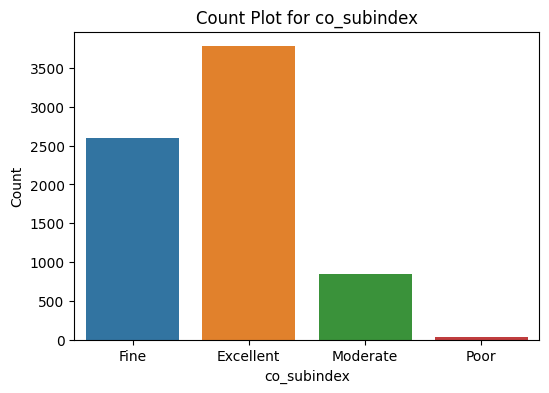

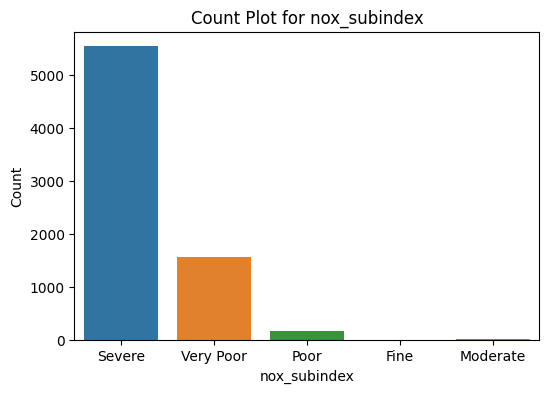

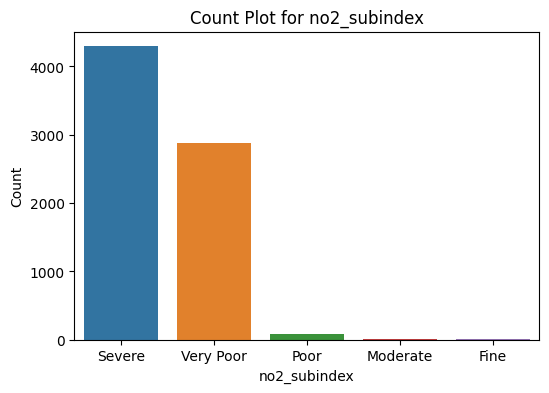

In [ ]:
sub_index_columns = ["co_subindex", "nox_subindex", "no2_subindex"]

# Plotting count plots for each sub-index column
for column in sub_index_columns:
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    sb.countplot(data=task5_airq_df, x=column)
    plt.title(f'Count Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Now we will use data encoding to transform the categories to numerical values from Severe:1 to Excellent:6. Then the maximum of the 3 values will be inputed into the AQI column.

In [ ]:
# Creating a dictionary mapping days of the week to numeric values
subindex_mapping = {
    'Severe': 1,
    'Very Poor': 2,
    'Poor': 3,
    'Moderate': 4,
    'Fine': 5,
    'Excellent': 6,
}

# Mapping day names to numeric values
task5_airq_df["co_num_subindex"] = task5_airq_df["co_subindex"].map(subindex_mapping)
task5_airq_df["nox_num_subindex"] = task5_airq_df["nox_subindex"].map(subindex_mapping)
task5_airq_df["no2_num_subindex"] = task5_airq_df["no2_subindex"].map(subindex_mapping)

In [ ]:
task5_airq_df.sample(2,random_state=1234)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),...,hour,peak_usage,valley_usage,numDayOfWeek,co_subindex,nox_subindex,no2_subindex,co_num_subindex,nox_num_subindex,no2_num_subindex
5756,4.4,1460.0,25.0,1430.0,524.0,466.0,125.0,1932.0,1604.0,23.0,...,14,0,0,5,Moderate,Severe,Severe,4,1,1
8546,2.8,1009.0,9.5,958.0,342.0,751.0,156.0,935.0,1006.0,1.4,...,20,1,0,2,Fine,Severe,Severe,5,1,1


In [ ]:
#Now get the max and input it into the new AIQ column
task5_airq_df['AIQ'] = task5_airq_df[['co_num_subindex', 'nox_num_subindex', 'no2_num_subindex']].min(axis=1)

In [ ]:
task5_airq_df.sample(2,random_state=1234)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T(C),...,peak_usage,valley_usage,numDayOfWeek,co_subindex,nox_subindex,no2_subindex,co_num_subindex,nox_num_subindex,no2_num_subindex,AIQ
5756,4.4,1460.0,25.0,1430.0,524.0,466.0,125.0,1932.0,1604.0,23.0,...,0,0,5,Moderate,Severe,Severe,4,1,1,1
8546,2.8,1009.0,9.5,958.0,342.0,751.0,156.0,935.0,1006.0,1.4,...,1,0,2,Fine,Severe,Severe,5,1,1,1


In [ ]:
task5_airq_df["AIQ"].value_counts()

1    5583
2    1604
3      70
4       1
Name: AIQ, dtype: int64

<ipython-input-66-981bb659c4f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(task5_airq_df.corr(),cmap='YlGnBu',annot=True)


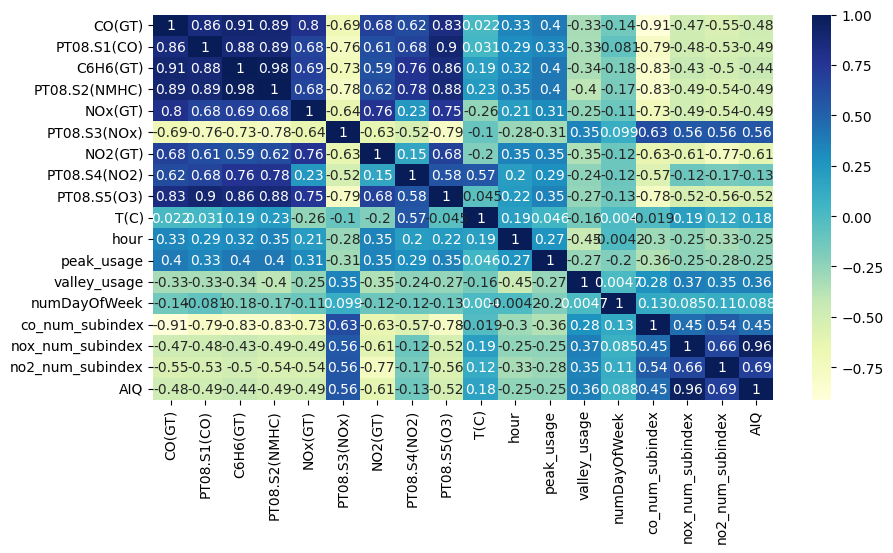

In [ ]:
plt.figure(figsize=(10,5))
sb.heatmap(task5_airq_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

To predict our AIQ variable none of the ground truth columns will be used. Instead we will use two of the least (pair-wise) correlated sensor columns  and also include the T(C), AH and  valley_usage variables.

In [ ]:
task5_lr_cols = ["PT08.S3(NOx)","PT08.S4(NO2)","T(C)","valley_usage","AIQ"]
task5_lr_df = task5_airq_df[task5_lr_cols].copy()

In [ ]:
# extract the features and labels as above and same them  in variables X and y
X = task5_lr_df.drop(columns=['AIQ'])
y = task5_lr_df['AIQ']
# shuffle and extract an 90/10 split of the data in the dataframe df using sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=1234)
# Print out the top few lines of each dataframe to check that the split was correct
print(X.shape,"\n",y.shape)
print(X_train.shape,"\n",y_train.shape)
print(X_test.shape,"\n",y_test.shape)
print(X_train.head(3))
print(X_test.head(3))
print(y_train.head(3))
print(y_test.head(3))

(7258, 4) 
 (7258,)
(6532, 4) 
 (6532,)
(726, 4) 
 (726,)
      PT08.S3(NOx)  PT08.S4(NO2)  T(C)  valley_usage
6293         656.0        1358.0  11.2             0
5085         525.0        1845.0  28.7             0
2684         723.0        1810.0  39.3             0
      PT08.S3(NOx)  PT08.S4(NO2)  T(C)  valley_usage
5756         466.0        1932.0  23.0             0
8546         751.0         935.0   1.4             0
2828         794.0        1622.0  39.9             0
6293    1
5085    1
2684    1
Name: AIQ, dtype: int64
5756    1
8546    1
2828    1
Name: AIQ, dtype: int64


## 5. Model definition and training
Gradient Boosting Regression excels as a model due to its exceptional predictive accuracy derived from the sequential combination of weak learners, such as decision trees, correcting errors in subsequent iterations. Its capacity to capture intricate relationships and handle missing data without imputation makes it versatile for complex datasets. Notably, it offers versatility in tuning hyperparameters to adapt to various problem types, and stands out for its robustness, making it a widely favored choice for regression tasks across diverse domains.

In [ ]:
# Create GBR object
GBR= GradientBoostingRegressor()

# Fit the model on scaled X train
GBR.fit(X_train,y_train)

# Make Predictions on X_test
yhat_gbr = GBR.predict(X_test)

In [ ]:
# Using the get_params() method
GBR.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

"We'll utilize RandomizedSearchCV to perform hyperparameter tuning by selecting parameters from the given dictionary with a range of values. Random search, exploring a broader hyperparameter space through random sampling, often exhibits slight advantages over grid search due to its efficiency in encountering optimal or near-optimal hyperparameters with fewer iterations, particularly in extensive search spaces."

In [ ]:
param_dist = {
    "learning_rate": [0.05, 0.1, 0.2],  # Learning rate
    "n_estimators": [100, 200, 300],  # Number of boosting stages
    "max_depth": [3, 5, 7],  # Maximum depth of trees
    "max_features": [ "log2", "sqrt", None],
    "max_leaf_nodes": [None, 10, 20, 30],
    "subsample": [0.8, 0.9, 1.0]
}

# Create a GradientBoostingRegressor instance
GBR = GradientBoostingRegressor()
# Create RandomizedSearchCV object
GBR_random_search = RandomizedSearchCV(estimator=GBR, param_distributions=param_dist,
                                       n_iter=10, scoring='r2', cv=5, random_state=42)
# 'n_iter' specifies the number of parameter settings sampled
# 'random_state' for reproducibility



In [ ]:
# Fit the RandomizedSearchCV
GBR_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['log2', 'sqrt', None],
                                        'max_leaf_nodes': [None, 10, 20, 30],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='r2')

In [ ]:
# Retrieve the best parameters and the best estimator
GBRbest_params = GBR_random_search.best_params_
GBRbest_estimator = GBR_random_search.best_estimator_

In [ ]:
# print(GBRbest_params)
print(GBRbest_estimator)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features='sqrt',
                          max_leaf_nodes=30, subsample=0.9)


In [ ]:
GBR_random_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 0.9,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'friedman_mse',
 'estimator__init': None,
 'estimator__learning_rate': 0.1,
 'estimator__loss': 'squared_error',
 'estimator__max_depth': 3,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_iter_no_change': None,
 'estimator__random_state': None,
 'estimator__subsample': 1.0,
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': GradientBoostingRegressor(),
 'n_iter': 10,
 'n_jobs': None,
 'param_distributions': {'learning_rate': [0.05, 0.1, 0.2],
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7],
  'max_features': ['log2', 'sqrt', None],
  'max_leaf_nodes': 

In [ ]:
# Making Predictions with tuned DTR
best_dtr = GBRbest_estimator
yhat_tunedGBR = best_dtr.predict(X_test)

## 6. Model evaluation
We will use the same method as earlier in task 1.

In [ ]:
eval_model("Gradient Boost Regressor Base Model",y_test,yhat_gbr)
eval_model("Gradient Boost Regressor Random Searched Model",y_test,yhat_tunedGBR)

Gradient Boost Regressor Base Model R2 score = 0.53
Gradient Boost Regressor Base Model Mean absolute error = 0.18
Gradient Boost Regressor Base Model Mean squared error = 0.09




Gradient Boost Regressor Random Searched Model R2 score = 0.55
Gradient Boost Regressor Random Searched Model Mean absolute error = 0.17
Gradient Boost Regressor Random Searched Model Mean squared error = 0.09






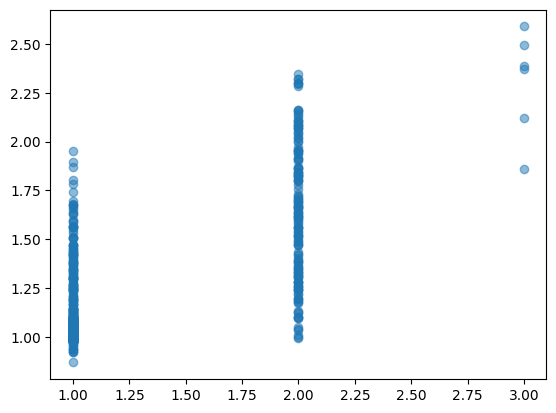

In [ ]:
plt.scatter(y_test, yhat_gbr,alpha=.5);

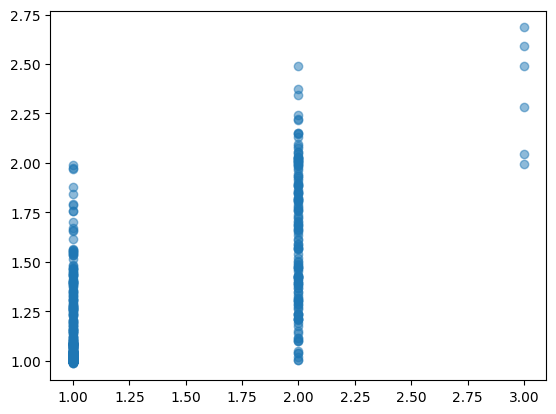

In [ ]:
plt.scatter(y_test, yhat_tunedGBR,alpha=.5);

# 7. Conclusions
1. Task 1 CO prediction.
 In dealing with the first task the percentage of NA values was taken into consideration to help determine the kind of treatment to be used for the NA columns. After the data preparation and data split the Decision tree regressor was used. An R2 score of 0.62 was gotten meaning that our model was able to explain about 62% of the variance in the CO(GT) variable. The low MAE and MSE values 0.53 and 0.66 respectively show that our model performed well. Upon hyperparameter tuning we were able to achieve slight improvements in the model with the R2, MAE and MSE having values of 0.65, 0.54 and 0.61 respectively. The scatter plots show that the tuned_DTR has a less evident linear relationship and fails to predict values from 5 and above. This could be regarded to as a flaw. One thing that can help improve the model is to standardise the inputs before taking them into the model. Also including more values in the range of the hyperparameter can be beneficial. A wider range allows for a more comprehensive search over the hyperparameter space, potentially leading to finding better combinations that improve the model's performance.
 Although, this would increase computationl power, cost and time. Our model has not done exceptionally well enough.

2. Task2 Defining Air Quality Index and Predicting with other Variables.
 The AIQ index was calculated using the guide from [this link](https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/). Because of the method used we see that very few observations had better than a score of 3(Poor). This time around a Gradient Boost Regressor model was used and was able to achive an R2 of 0.67, MAE 0.15, and MSE 0.07. The MAE and MSE being very low shows our model performed well. One major concern is how the data might perform on external data outside the provided dataset. The inbalance in the clases of the AIQ already form a basis for a biased model. One thing that can help will be to use balancing methods like SMOTE (Synthetic Minority Oversampling Technique) to help make all the classes equally represented. Also more research on a much more fair AIQ calculation can be done.



Sources:


REFRENCE

1. Aarshay Jain, 2016. Complete Machine Learning Guide to Parameter Tuning in Gradient Boosting (GBM) in Python: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

2. Aylin Tokuc,2023. Splitting a Dataset into Train and Test Sets: https://www.baeldung.com/cs/train-test-datasets-ratio#:~:text=With%20datasets%20containing%20considerably%20high,with%20an%2080%3A20%20split.

3. Bext.,T, 2021. How to perform automatic hyper parameter tuning using GridSearchCV : https://towardsdatascience.com/automatic-hyperparameter-tuning-with-sklearn-gridsearchcv-and-randomizedsearchcv-e94f53a518ee

4. Breeze Technology, 2020. Available at: https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/

5. Data Quest,2018. Understanding Regression Error Metrics in PythonRegression Metrics : Available at: https://www.dataquest.io/blog/understanding-regression-error-metrics/#:~:text=The%20mean%20absolute%20error%20

6. FEDESORIANO, 2020. Air Quality Data. Data Dictionary of dataset, Available at: https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set/data

7. Saverio De Vito and Marco Piga and Luca Martinotto and Girolamo Di Francia,2009. CO, NO2 and NOx urban pollution monitoring with on-field calibrated electronic nose by automatic bayesian regularization, Sensors and Actuators B-chemical, 143,pp.182-191,https://api.semanticscholar.org/CorpusID:95668760

8. Sebastain Taylor,2023. Understanding R-Squared model evaluation metric : https://corporatefinanceinstitute.com/resources/data-science/r-squared/

9. Swaroop Piduguralla,2023.  A tale of Hyperparameter Tuning : https://www.linkedin.com/pulse/tale-hyperparameter-tuning-random-search-cv-grid-swaroop-piduguralla/

10. Viswa, 2023. Unveiling Decision Tree Regression: Exploring its Principles, Implementation: https://medium.com/@vk.viswa/unveiling-decision-tree-regression-exploring-its-principles-implementation-beb882d756c6

11. Vopani, 2020. Calculating AQI (Air Quality Index) Tutorial, available at: https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial